In [2]:
import pandas as pd
import numpy as np

In [15]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
data = pd.read_csv('Instagram/instagram_data/Instagram_07_12_22.csv')
dax40 = pd.read_csv('DAX40_21_12_22.csv')
dax40 = dax40[:40]

data['year'] = pd.to_datetime(data['date']).dt.year
data

c:\Users\TheaK\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,platformId,platform,date,updated,type,description,postUrl,subscriberCount,score,media,statistics,account,likeAndViewCountsDisabled,history,languageCode,legacyId,id,expandedLinks,imageText,brandedContentSponsor,year
0,445347648_10145706,Instagram,2011-12-21 21:09:03,2022-06-23 22:21:39,photo,"On a shoot in #LA today, some great new gear d...",https://www.instagram.com/p/ai3dA/,0,-404.747748,"[{'type': 'photo', 'url': 'https://scontent-yy...","{'actual': {'favoriteCount': 106, 'commentCoun...","{'id': 96146, 'name': 'PUMA', 'handle': 'puma'...",False,"[{'actual': {'favoriteCount': 106, 'commentCou...",en,0,96146|445347648,NaN,NaN,NaN,2011
1,416336407_10145706,Instagram,2011-12-12 23:03:04,2022-06-23 22:21:39,photo,Did we mention #MarMostro is back in action?! ...,https://www.instagram.com/p/Y0MoX/,0,-264.276471,"[{'type': 'photo', 'url': 'https://scontent-yy...","{'actual': {'favoriteCount': 165, 'commentCoun...","{'id': 96146, 'name': 'PUMA', 'handle': 'puma'...",False,"[{'actual': {'favoriteCount': 165, 'commentCou...",en,0,96146|416336407,NaN,NaN,NaN,2011
2,415975256_10145706,Instagram,2011-12-12 20:30:56,2022-06-23 22:21:39,photo,"#PUMA #BOXPARK now open in #London, come say h...",https://www.instagram.com/p/Yy0dY/,0,-623.986111,"[{'type': 'photo', 'url': 'https://scontent-yy...","{'actual': {'favoriteCount': 70, 'commentCount...","{'id': 96146, 'name': 'PUMA', 'handle': 'puma'...",False,"[{'actual': {'favoriteCount': 70, 'commentCoun...",en,0,96146|415975256,NaN,NaN,NaN,2011
3,415786745_10145706,Instagram,2011-12-12 18:55:32,2022-06-23 22:21:39,photo,Snow white Undefeated #PUMA Clyde.,https://www.instagram.com/p/YyGb5/,0,-207.036866,"[{'type': 'photo', 'url': 'https://scontent-yy...","{'actual': {'favoriteCount': 206, 'commentCoun...","{'id': 96146, 'name': 'PUMA', 'handle': 'puma'...",False,"[{'actual': {'favoriteCount': 206, 'commentCou...",en,0,96146|415786745,NaN,NaN,NaN,2011
4,397353610_10145706,Instagram,2011-12-06 18:44:13,2022-06-23 22:21:39,photo,Not exactly how #MarMostro wanted to arrive in...,https://www.instagram.com/p/XryKK/,0,-265.840237,"[{'type': 'photo', 'url': 'https://scontent-yy...","{'actual': {'favoriteCount': 163, 'commentCoun...","{'id': 96146, 'name': 'PUMA', 'handle': 'puma'...",False,"[{'actual': {'favoriteCount': 163, 'commentCou...",en,0,96146|397353610,NaN,NaN,NaN,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66944,2741453865851812097_45938944082,Instagram,2022-01-01 08:46:29,2022-06-22 21:54:32,photo,"New year, new opportunities, new ways! Because...",https://www.instagram.com/p/CYLmcQiN_kB/,0,-2.363636,"[{'type': 'photo', 'url': 'https://scontent-se...","{'actual': {'favoriteCount': 11, 'commentCount...","{'id': 19814223, 'name': 'RWE', 'handle': 'rwe...",False,"[{'actual': {'favoriteCount': 11, 'commentCoun...",und,0,19814223|2741453865851812097,NaN,NaN,NaN,2022
66945,2741453733403986223_45938944082,Instagram,2022-01-01 08:46:13,2022-06-22 21:54:32,photo,"New year, new opportunities, new ways! Because...",https://www.instagram.com/p/CYLmaVLtokv/,0,1.346154,"[{'type': 'photo', 'url': 'https://scontent-se...","{'actual': {'favoriteCount': 35, 'commentCount...","{'id': 19814223, 'name': 'RWE', 'handle': 'rwe...",False,"[{'actual': {'favoriteCount': 35, 'commentCoun...",und,0,19814223|2741453733403986223,NaN,NaN,NaN,2022
66946,2741446388924616641_43109246,Instagram,2022-01-01 08:31:38,2022-07-07 23:43:39,album,"Good morning, welcome to 2022, who wants to go...",https://www.instagram.com/p/CYLkvdGoQ_B/,32367896,1.882496,"[{'type': 'photo', 'url': 'https://scontent-se...","{'actual': {'favoriteCount': 200025, 'commentC...","{'id': 54080, 'name': 'BMW', 'handle': 'bmw', ...",False,"[{'actual': {'favoriteCount': 200025, 'comment...",en,0,54080|2741446388924616641,NaN,NaN,NaN,2022
66947,2741400684827739353_25749975,Instagram,2022-01-01 07:00:49,2022-05-27 23:40:36,album,A #dreamcar from reality. \n\n📸 @bymattisson\n...,https://www.instagram.com/p/CYLaW

In [13]:
data['history'][10]

"[{'actual': {'favoriteCount': 113, 'commentCount': 10}, 'expected': {'favoriteCount': 44510, 'commentCount': 417}, 'timestep': 74, 'date': '2022-06-23 22:21:39', 'score': -365.260162601626}]"

In [16]:
import ast
df = data["account"].astype('str')
df = df.apply(lambda x: ast.literal_eval(x))
df = df.apply(pd.Series)
data['author'] = df['name']
data['username'] = df['handle']

df = data["statistics"].astype('str')
df = df.apply(lambda x: ast.literal_eval(x))
df = df.apply(pd.Series)
data['actual'] = df['actual']
df = data["actual"].astype('str')
df = df.apply(lambda x: ast.literal_eval(x))
df = df.apply(pd.Series)
data['likes'] = df['favoriteCount']
data['comments'] = df['commentCount']
data

,platformId,platform,date,updated,type,description,postUrl,subscriberCount,score,media,statistics,account,likeAndViewCountsDisabled,history,languageCode,legacyId,id,expandedLinks,imageText,brandedContentSponsor,year,author,username,actual,likes,comments
0,445347648_10145706,Instagram,2011-12-21 21:09:03,2022-06-23 22:21:39,photo,"On a shoot in #LA today, some great new gear d...",https://www.instagram.com/p/ai3dA/,0,-404.747748,"[{'type': 'photo', 'url': 'https://scontent-yy...","{'actual': {'favoriteCount': 106, 'commentCoun...","{'id': 96146, 'name': 'PUMA', 'handle': 'puma'...",False,"[{'actual': {'favoriteCount': 106, 'commentCou...",en,0,96146|445347648,NaN,NaN,NaN,2011,PUMA,puma,"{'favoriteCount': 106, 'commentCount': 5}",106,5
1,416336407_10145706,Instagram,2011-12-12 23:03:04,2022-06-23 22:21:39,photo,Did we mention #MarMostro is back in action?! ...,https://www.instagram.com/p/Y0MoX/,0,-264.276471,"[{'type': 'photo', 'url': 'https://scontent-yy...","{'actual': {'favoriteCount': 165, 'commentCoun...","{'id': 96146, 'name': 'PUMA', 'handle': 'puma'...",False,"[{'actual': {'favoriteCount': 165, 'commentCou...",en,0,96146|416336407,NaN,NaN,NaN,2011,PUMA,puma,"{'favoriteCount': 165, 'commentCount': 5}",165,5
2,415975256_10145706,Instagram,2011-12-12 20:30:56,2022-06-23 22:21:39,photo,"#PUMA #BOXPARK now open in #London, come say h...",https://www.instagram.com/p/Yy0dY/,0,-623.986111,"[{'type': 'photo', 'url': 'https://scontent-yy...","{'actual': {'favoriteCount': 70, 'commentCount...","{'id': 96146, 'name': 'PUMA', 'handle': 'puma'...",False,"[{'actual': {'favoriteCount': 70, 'commentCoun...",en,0,96146|415975256,NaN,NaN,NaN,2011,PUMA,puma,"{'favoriteCount': 70, 'commentCount': 2}",70,2
3,415786745_10145706,Instagram,2011-12-12 18:55:32,2022-06-23 22:21:39,photo,Snow white Undefeated #PUMA Clyde.,https://www.instagram.com/p/YyGb5/,0,-207.036866,"[{'type': 'photo', 'url': 'https://scontent-yy...","{'actual': {'favoriteCount': 206, 'commentCoun...","{'id': 96146, 'name': 'PUMA', 'handle': 'puma'...",False,"[{'actual': {'favoriteCount': 206, 'commentCou...",en,0,96146|415786745,NaN,NaN,NaN,2011,PUMA,puma,"{'favoriteCount': 206, 'commentCount': 11}",206,11
4,397353610_10145706,Instagram,2011-12-06 18:44:13,2022-06-23 22:21:39,photo,Not exactly how #MarMostro wanted to arrive in...,https://www.instagram.com/p/XryKK/,0,-265.840237,"[{'type': 'photo', 'url': 'https://scontent-yy...","{'actual': {'favoriteCount': 163, 'commentCoun...","{'id': 96146, 'name': 'PUMA', 'handle': 'puma'...",False,"[{'actual': {'favoriteCount': 163, 'commentCou...",en,0,96146|397353610,NaN,NaN,NaN,2011,PUMA,puma,"{'favoriteCount': 163, 'commentCount': 6}",163,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66944,2741453865851812097_45938944082,Instagram,2022-01-01 08:46:29,2022-06-22 21:54:32,photo,"New year, new opportunities, new ways! Because...",https://www.instagram.com/p/CYLmcQiN_kB/,0,-2.363636,"[{'type': 'photo', 'url': 'https://scontent-se...","{'actual': {'favoriteCount': 11, 'commentCount...","{'id': 19814223, 'name': 'RWE', 'handle': 'rwe...",False,"[{'actual': {'favoriteCount': 11, 'commentCoun...",und,0,19814223|2741453865851812097,NaN,NaN,NaN,2022,RWE,rwe.global,"{'favoriteCount': 11, 'commentCount': 0}",11,0
66945,2741453733403986223_45938944082,Instagram,2022-01-01 08:46:13,2022-06-22 21:54:32,photo,"New year, new opportunities, new ways! Because...",https://www.instagram.com/p/CYLmaVLtokv/,0,1.346154,"[{'type': 'photo', 'url': 'https://scontent-se...","{'actual': {'favoriteCount': 35, 'commentCount...","{'id': 19814223, 'name': 'RWE', 'handle': 'rwe...",False,"[{'actual': {'favoriteCount': 35, 'commentCoun...",und,0,19814223|2741453733403986223,NaN,NaN,NaN,2022,RWE,rwe.global,"{'favoriteCount': 35, 'commentCount': 0}",35,0
66946,2741446388924616641_43109246,Instagram,2022-01-01 08:31:38,2022-07-07 23:43:39,album,"Good morning, welcome to 2022, who wants to go...",https://www

In [17]:
data

,platformId,platform,date,updated,type,description,postUrl,subscriberCount,score,media,statistics,account,likeAndViewCountsDisabled,history,languageCode,legacyId,id,expandedLinks,imageText,brandedContentSponsor,year,author,username,actual,likes,comments
0,445347648_10145706,Instagram,2011-12-21 21:09:03,2022-06-23 22:21:39,photo,"On a shoot in #LA today, some great new gear d...",https://www.instagram.com/p/ai3dA/,0,-404.747748,"[{'type': 'photo', 'url': 'https://scontent-yy...","{'actual': {'favoriteCount': 106, 'commentCoun...","{'id': 96146, 'name': 'PUMA', 'handle': 'puma'...",False,"[{'actual': {'favoriteCount': 106, 'commentCou...",en,0,96146|445347648,NaN,NaN,NaN,2011,PUMA,puma,"{'favoriteCount': 106, 'commentCount': 5}",106,5
1,416336407_10145706,Instagram,2011-12-12 23:03:04,2022-06-23 22:21:39,photo,Did we mention #MarMostro is back in action?! ...,https://www.instagram.com/p/Y0MoX/,0,-264.276471,"[{'type': 'photo', 'url': 'https://scontent-yy...","{'actual': {'favoriteCount': 165, 'commentCoun...","{'id': 96146, 'name': 'PUMA', 'handle': 'puma'...",False,"[{'actual': {'favoriteCount': 165, 'commentCou...",en,0,96146|416336407,NaN,NaN,NaN,2011,PUMA,puma,"{'favoriteCount': 165, 'commentCount': 5}",165,5
2,415975256_10145706,Instagram,2011-12-12 20:30:56,2022-06-23 22:21:39,photo,"#PUMA #BOXPARK now open in #London, come say h...",https://www.instagram.com/p/Yy0dY/,0,-623.986111,"[{'type': 'photo', 'url': 'https://scontent-yy...","{'actual': {'favoriteCount': 70, 'commentCount...","{'id': 96146, 'name': 'PUMA', 'handle': 'puma'...",False,"[{'actual': {'favoriteCount': 70, 'commentCoun...",en,0,96146|415975256,NaN,NaN,NaN,2011,PUMA,puma,"{'favoriteCount': 70, 'commentCount': 2}",70,2
3,415786745_10145706,Instagram,2011-12-12 18:55:32,2022-06-23 22:21:39,photo,Snow white Undefeated #PUMA Clyde.,https://www.instagram.com/p/YyGb5/,0,-207.036866,"[{'type': 'photo', 'url': 'https://scontent-yy...","{'actual': {'favoriteCount': 206, 'commentCoun...","{'id': 96146, 'name': 'PUMA', 'handle': 'puma'...",False,"[{'actual': {'favoriteCount': 206, 'commentCou...",en,0,96146|415786745,NaN,NaN,NaN,2011,PUMA,puma,"{'favoriteCount': 206, 'commentCount': 11}",206,11
4,397353610_10145706,Instagram,2011-12-06 18:44:13,2022-06-23 22:21:39,photo,Not exactly how #MarMostro wanted to arrive in...,https://www.instagram.com/p/XryKK/,0,-265.840237,"[{'type': 'photo', 'url': 'https://scontent-yy...","{'actual': {'favoriteCount': 163, 'commentCoun...","{'id': 96146, 'name': 'PUMA', 'handle': 'puma'...",False,"[{'actual': {'favoriteCount': 163, 'commentCou...",en,0,96146|397353610,NaN,NaN,NaN,2011,PUMA,puma,"{'favoriteCount': 163, 'commentCount': 6}",163,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66944,2741453865851812097_45938944082,Instagram,2022-01-01 08:46:29,2022-06-22 21:54:32,photo,"New year, new opportunities, new ways! Because...",https://www.instagram.com/p/CYLmcQiN_kB/,0,-2.363636,"[{'type': 'photo', 'url': 'https://scontent-se...","{'actual': {'favoriteCount': 11, 'commentCount...","{'id': 19814223, 'name': 'RWE', 'handle': 'rwe...",False,"[{'actual': {'favoriteCount': 11, 'commentCoun...",und,0,19814223|2741453865851812097,NaN,NaN,NaN,2022,RWE,rwe.global,"{'favoriteCount': 11, 'commentCount': 0}",11,0
66945,2741453733403986223_45938944082,Instagram,2022-01-01 08:46:13,2022-06-22 21:54:32,photo,"New year, new opportunities, new ways! Because...",https://www.instagram.com/p/CYLmaVLtokv/,0,1.346154,"[{'type': 'photo', 'url': 'https://scontent-se...","{'actual': {'favoriteCount': 35, 'commentCount...","{'id': 19814223, 'name': 'RWE', 'handle': 'rwe...",False,"[{'actual': {'favoriteCount': 35, 'commentCoun...",und,0,19814223|2741453733403986223,NaN,NaN,NaN,2022,RWE,rwe.global,"{'favoriteCount': 35, 'commentCount': 0}",35,0
66946,2741446388924616641_43109246,Instagram,2022-01-01 08:31:38,2022-07-07 23:43:39,album,"Good morning, welcome to 2022, who wants to go...",https://www

In [18]:
dax_attributes = dax40.rename(columns={"instagram": "username"})[["username", "Branche", "Branche-6", "Sektor", "B2B", "B2C"]]
data = data.merge(dax_attributes, how="left", on="username")

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66949 entries, 0 to 66948
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   platformId                 66949 non-null  object 
 1   platform                   66949 non-null  object 
 2   date                       66949 non-null  object 
 3   updated                    66949 non-null  object 
 4   type                       66949 non-null  object 
 5   description                66852 non-null  object 
 6   postUrl                    66949 non-null  object 
 7   subscriberCount            66949 non-null  int64  
 8   score                      66949 non-null  float64
 9   media                      66946 non-null  object 
 10  statistics                 66949 non-null  object 
 11  account                    66949 non-null  object 
 12  likeAndViewCountsDisabled  66949 non-null  bool   
 13  history                    66949 non-null  obj

In [20]:
word_list_en = ['sustainab','climate','green','environment','ecofriendly','eco-friendly','biodegra','renewable','nature','decarbon','recycl', 'pollution','waste','wind energy','co2','solar', 'emissions','global warming','fair trade']
word_list_de = word_list = ['nachhaltig', 'klima','umwelt','ökolog','erneuerbar','bio ','natur ']
word_list = word_list_de + word_list_en
all = data.shape[0]
for word in word_list:
    print(word, round(data.loc[data['description'].str.contains(word, na=False, case=False,regex=True)].shape[0]*100.0/all,2), "%")

nachhaltig 0.3 %
klima 0.18 %
umwelt 0.13 %
ökolog 0.01 %
erneuerbar 0.03 %
bio  1.18 %
natur  0.02 %
sustainab 3.54 %
climate 0.82 %
green 2.33 %
environment 1.14 %
ecofriendly 0.04 %
eco-friendly 0.03 %
biodegra 0.05 %
renewable 1.2 %
nature 1.48 %
decarbon 0.09 %
recycl 0.28 %
pollution 0.09 %
waste 0.46 %
wind energy 0.02 %
co2 12.24 %
solar 0.43 %
emissions 8.45 %
global warming 0.01 %
fair trade 0.01 %


In [21]:
regex_query = ('|').join(word_list)
data['green'] = data['description'].str.contains(regex_query, na=False, case=False,regex=True)
green = data.loc[data.green]


In [22]:
num_posts = data.groupby(['author']).count()
num_posts

,platformId,platform,date,updated,type,description,postUrl,subscriberCount,score,media,statistics,account,likeAndViewCountsDisabled,history,languageCode,legacyId,id,expandedLinks,imageText,brandedContentSponsor,year,username,actual,likes,comments,Branche,Branche-6,Sektor,B2B,B2C,green
author,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Airbus,948,948,948,948,948,947,948,948,948,948,948,948,948,948,948,948,948,23,28,0,948,948,948,948,948,948,948,948,948,948,948
Allianz,273,273,273,273,273,265,273,273,273,273,273,273,273,273,273,273,273,10,43,0,273,273,273,273,273,273,273,273,273,273,273
BASF,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888,888,61,64,0,888,888,888,888,888,888,888,888,888,888,888
BMW,9329,9329,9329,9329,9329,9324,9329,9329,9329,9329,9329,9329,9329,9329,9329,9329,9329,3550,178,0,9329,9329,9329,9329,9329,9329,9329,9329,9329,9329,9329
Bayer,698,698,698,698,698,698,698,698,698,698,698,698,698,698,698,698,698,33,61,0,698,698,698,698,698,698,698,698,698,698,698
Beiersdorf,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,0,17,0,42,42,42,42,42,42,42,42,42,42,42
Continental Tire,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,39,66,0,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201,2201
Covestro,458,458,458,458,458,458,458,458,458,458,458,458,458,458,458,458,458,23,197,0,458,458,458,458,458,458,458,458,458,458,458
Daimler Truck,1724,1724,1724,1724,1724,1723,1724,1724,1724,1724,1724,1724,1724,1724,1724,1724,1724,87,73,0,1724,1724,1724,1724,1724,1724,1724,1724,1724,1724,1724


In [23]:
num_greens = green.groupby(['author']).count()
num_greens

,platformId,platform,date,updated,type,description,postUrl,subscriberCount,score,media,statistics,account,likeAndViewCountsDisabled,history,languageCode,legacyId,id,expandedLinks,imageText,brandedContentSponsor,year,username,actual,likes,comments,Branche,Branche-6,Sektor,B2B,B2C,green
author,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Airbus,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,62,4,3,0,62,62,62,62,62,62,62,62,62,62,62
Allianz,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,2,12,0,43,43,43,43,43,43,43,43,43,43,43
BASF,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,272,23,26,0,272,272,272,272,272,272,272,272,272,272,272
BMW,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3462,86,0,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792,3792
Bayer,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,2,23,0,147,147,147,147,147,147,147,147,147,147,147
Beiersdorf,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,0,4,0,9,9,9,9,9,9,9,9,9,9,9
Continental Tire,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,0,5,0,180,180,180,180,180,180,180,180,180,180,180
Covestro,227,227,227,227,227,227,227,227,227,227,227,227,227,227,227,227,227,9,104,0,227,227,227,227,227,227,227,227,227,227,227
Daimler Truck,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,35,15,0,313,313,313,313,313,313,313,313,313,313,313


In [24]:
comparison = num_greens.join(num_posts, lsuffix="_green", rsuffix="_all")
comparison['percentage'] = round(comparison['description_green']*100.0/comparison['description_all'],1)
comp = comparison[['percentage', 'description_all']]
comp.sort_values(by=['percentage'])

,percentage,description_all
author,,
Volkswagen,1.8,3144
PUMA,2.2,3339
Fresenius,2.6,529
"Munich Re, US",2.7,113
Zalando,3.3,6516
Deutsche Telekom AG,3.8,1610
Siemens Healthineers,4.1,363
Deutsche Post AG,5.8,1644
Airbus,6.5,947


In [25]:
groupby = "Branche-6"
num_all = data.groupby([groupby]).count()
num_greens = green.groupby([groupby]).count()
comparison = num_greens.join(num_all, lsuffix="_green", rsuffix="_all")
comparison['percentage'] = round(comparison['description_green']*100.0/comparison['description_all'],1)
comp = comparison[['percentage', 'description_all']]
comp.sort_values(by=['percentage'])

,percentage,description_all
Branche-6,,
Gesundheitswesen,3.3,892
Textil,3.4,10739
Kommunkation/IT,5.6,4797
Sonstiges,13.6,1410
Finance/Insurance,22.6,1443
Automobil,24.3,37669
Technik,31.6,9902


In [26]:
data.groupby(['year']).count()

,platformId,platform,date,updated,type,description,postUrl,subscriberCount,score,media,statistics,account,likeAndViewCountsDisabled,history,languageCode,legacyId,id,expandedLinks,imageText,brandedContentSponsor,author,username,actual,likes,comments,Branche,Branche-6,Sektor,B2B,B2C,green
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011,51,51,51,51,51,48,51,51,51,51,51,51,51,51,51,51,51,0,0,0,51,51,51,51,51,51,51,51,51,51,51
2012,1188,1188,1188,1188,1188,1172,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,48,3,0,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188,1188
2013,2656,2656,2656,2656,2656,2648,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,74,34,0,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656,2656
2014,3248,3248,3248,3248,3248,3243,3248,3248,3248,3248,3248,3248,3248,3248,3248,3248,3248,87,51,0,3248,3248,3248,3248,3248,3248,3248,3248,3248,3248,3248
2015,5215,5215,5215,5215,5215,5214,5215,5215,5215,5215,5215,5215,5215,5215,5215,5215,5215,376,66,0,5215,5215,5215,5215,5215,5215,5215,5215,5215,5215,5215
2016,7625,7625,7625,7625,7625,7617,7625,7625,7625,7625,7625,7625,7625,7625,7625,7625,7625,688,114,0,7625,7625,7625,7625,7625,7625,7625,7625,7625,7625,7625
2017,7284,7284,7284,7284,7284,7282,7284,7284,7284,7284,7284,7284,7284,7284,7284,7284,7284,661,129,0,7284,7284,7284,7284,7284,7284,7284,7284,7284,7284,7284
2018,7447,7447,7447,7447,7447,7442,7447,7447,7447,7447,7447,7447,7447,7447,7447,7447,7447,1433,241,0,7447,7447,7447,7447,7447,7447,7447,7447,7447,7447,7447
2019,8236,8236,8236,8236,8236,8212,8236,8236,8236,8236,8236,8236,8236,8236,8236,8236,8236,1831,314,0,8236,8236,8236,8236,8236,8236,8236,8236,8236,8236,8236


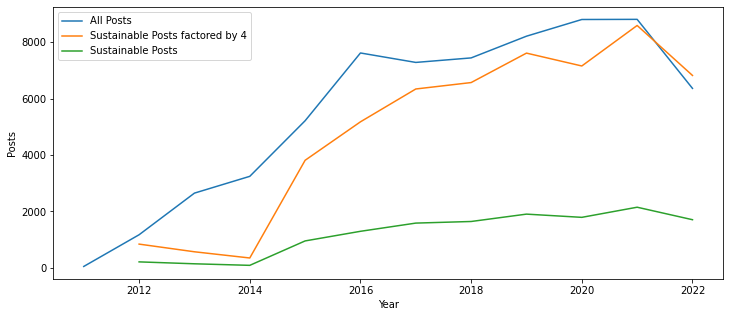

In [31]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
ax = data.groupby(['year']).count()['description'].plot(label='All Posts')
green.groupby(['year']).count()['description'].multiply(4).plot(ax=ax, label='Sustainable Posts factored by 4')
green.groupby(['year']).count()['description'].plot(figsize=(12,5),ax=ax, label='Sustainable Posts')
ax.set_xlabel("Year")
ax.set_ylabel("Posts")
ax.legend()